### Selma Attié

## Comment les utilisateurs perçoivent-ils l'application "Paris JO Ticket 2024" en termes de fonctionnalité, d'utilisabilité et de satisfaction générale, et quelles sont les principales préoccupations exprimées dans les commentaires des utilisateurs ?

### INSTALLATION NECESSAIRES


In [ ]:
#Installation d’un outil qui aide à gérer et télécharger automatiquement les pilotes nécessaires
!pip install webdriver_manager

In [ ]:
#On installe les bibliothèques nécessaires
!pip install selenium
!pip install jyquickhelper

### IMPORTATION LIBRAIRIES

In [ ]:
#On importe les modules nécessaires de Selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
#On importe les bibliothèques standard
import time
import pandas as pd

In [ ]:
#Importation de nltk (Natural Language Toolkit
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/selmaattie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import jyquickhelper

In [ ]:
jyquickhelper.add_notebook_menu()

### Scraping

In [ ]:
#Déclaration de l'URL que Selenium doit visiter
url = "https://play.google.com/store/apps/details?id=org.paris2024.ticketapp&hl=fr"

In [ ]:
#Initialisation du driver web permettant à Selenium d'ouvrir une fen^tre Chrome automatisé
driver = webdriver.Chrome()

#Requête et Visite vers l'URL souhaitée
driver.get(url)

In [ ]:
#On recherche le bouton "Afficher tous les avis" et on clic sur ce bouton pour charger plus de commentaires

more_button = driver.find_element(by=By.XPATH, value="//span[contains(text(),'Afficher tous les avis')]")
more_button.click()

ElementClickInterceptedException: Message: element click intercepted: Element <span jsname="V67aGc" class="VfPpkd-vQzf8d">...</span> is not clickable at point (125, 225). Other element would receive the click: <div class="VfPpkd-IE5DDf" jsname="GGAcbc" jsaction="click:KY1IRb"></div>
  (Session info: chrome=126.0.6478.62)
Stacktrace:
0   chromedriver                        0x0000000100767a44 chromedriver + 4389444
1   chromedriver                        0x0000000100760350 chromedriver + 4358992
2   chromedriver                        0x000000010037cafc chromedriver + 281340
3   chromedriver                        0x00000001003c4cb0 chromedriver + 576688
4   chromedriver                        0x00000001003c3254 chromedriver + 569940
5   chromedriver                        0x00000001003c13e4 chromedriver + 562148
6   chromedriver                        0x00000001003c0580 chromedriver + 558464
7   chromedriver                        0x00000001003b5ce0 chromedriver + 515296
8   chromedriver                        0x00000001003b5718 chromedriver + 513816
9   chromedriver                        0x00000001003f7cec chromedriver + 785644
10  chromedriver                        0x00000001003b3ed0 chromedriver + 507600
11  chromedriver                        0x00000001003b48a8 chromedriver + 510120
12  chromedriver                        0x000000010072f3c8 chromedriver + 4158408
13  chromedriver                        0x0000000100733e2c chromedriver + 4177452
14  chromedriver                        0x0000000100715088 chromedriver + 4051080
15  chromedriver                        0x0000000100734718 chromedriver + 4179736
16  chromedriver                        0x0000000100708088 chromedriver + 3997832
17  chromedriver                        0x00000001007520e0 chromedriver + 4301024
18  chromedriver                        0x000000010075225c chromedriver + 4301404
19  chromedriver                        0x000000010075ff48 chromedriver + 4357960
20  libsystem_pthread.dylib             0x000000019813af94 _pthread_start + 136
21  libsystem_pthread.dylib             0x0000000198135d34 thread_start + 8


In [ ]:
# On recherche et récupère  tous les éléments contenant des commentaires

comments = driver.find_elements(by=By.XPATH, value = ".//div[@class='h3YV2d']")

In [ ]:
#On récupère les nouveaux commentaires et calcul du nombre de nouveaux commentaires
new_comments = driver.find_elements(By.XPATH, ".//div[@class='h3YV2d']")
new_comments_len = len(new_comments)

In [ ]:
#On affiche le nombre de commentaires récupérés ( plus on scroller vers le bas plus on va collecter des commentaires)
len(comments)

150

In [ ]:
#On affiche le type de l'objet comments.

type(comments)

list

In [ ]:
#On affiche le premier élément dans la liste des commentaires.

comments[0]

<selenium.webdriver.remote.webelement.WebElement (session="2e6ef47f1630d6df1f64aaccdad4d06e", element="f.A43ADAB0673EC92E80AC7260538FEF95.d.690400C4FBB858BC339F17395CCADD96.e.793")>

In [ ]:
#On affiche le texte du premier commentaire.

comments[0].text

''

In [ ]:
# Création d'une liste des textes associés à la liste des objets selenium récupérés (commentaires)
textlist = []

for comment in comments:
    texte = comment.text
    #print(texte)
    textlist.append(texte)

In [ ]:
# Creation d'un dataframe pour stocker et manipuler les commentaires plus aisément.
data = pd.DataFrame(textlist, columns=['Commentaires'])
data

,Commentaires
0,
1,
2,
3,Je ne comprends pas comment on récupère les bi...
4,Mes.billets achetés pour 450 euros n apparaiss...
...,...
145,Parfait
146,I can't connect
147,Works great for tickets
148,Je n' ai pas accès à mes billets ?? Je ne sais...


In [ ]:
#On sauvegarde du DataFrame dans un fichier CSV
data.to_csv("EMLV_Data_Seminaire_juin24.csv", encoding ="utf-8-sig")

In [ ]:
data = pd.read_csv("EMLV_Data_Seminaire_juin24.csv", sep =',', encoding ="utf-8-sig", index_col = 0)
data.head()

,Commentaires
0,NaN
1,NaN
2,NaN
3,Je ne comprends pas comment on récupère les bi...
4,Mes.billets achetés pour 450 euros n apparaiss...


In [ ]:
#On affiche le nombre de lignes et de colonnes
data.shape

(150, 1)

In [ ]:
#On affiche le nombre de valeurs manquantes pour chaque colonne.
data.isna().sum()

Commentaires    3
dtype: int64

In [ ]:
# On supprime les trois premières lignes du DataFrame.
data = data.iloc[3:]

In [ ]:
data.head()

,Commentaires
3,Je ne comprends pas comment on récupère les bi...
4,Mes.billets achetés pour 450 euros n apparaiss...
5,Maj 05/06 : Toujours bloqué. Impossibiliter de...
6,Grâce à un commentaire mis sur cette applicati...
7,Même problème que beaucoup. Impossible de fina...


### Analyse textuelle ou text mining

In [ ]:
# On nettoie le texte
def clean_text(text: str) -> str:
    """
    Clean the given text by lowercasing, removing URLs, non-ASCII characters, etc.

    Parameters:
    - text (str): The text to clean.

    Returns:
    - str: The cleaned text.
    """
    text = text.lower()
    text = re.sub(r'http\S+', '', text, flags=re.MULTILINE) # remove URLs
    text = re.sub(r"[^\s\d]+\.[^\s\d]+", "", text)
    text = text.replace('\n', ' ').replace('\r', '')
    text = re.sub(r"[^\w\d'\s]+", '', text)
    text = ' '.join(x for x in text.split() if not x.startswith('@'))
    text = unidecode(text)

    return text

In [ ]:
# On applique la fonction de nettoyage à chaque commentaire dans le DataFrame
exemple = data["Commentaires"][22]
exemple

"Application qui sert strictement à rien mais vraiment strictement à rien, c'est une coquille vide cette application dès qu'on clique sur un lien ça nous renvoie sur une page internet !👎 C'est vraiment du grand n'importe quoi, quel est l'intérêt de faire une application !!!!!😠"

In [ ]:
exemple.split()

['Application',
 'qui',
 'sert',
 'strictement',
 'à',
 'rien',
 'mais',
 'vraiment',
 'strictement',
 'à',
 'rien,',
 "c'est",
 'une',
 'coquille',
 'vide',
 'cette',
 'application',
 'dès',
 "qu'on",
 'clique',
 'sur',
 'un',
 'lien',
 'ça',
 'nous',
 'renvoie',
 'sur',
 'une',
 'page',
 'internet',
 '!👎',
 "C'est",
 'vraiment',
 'du',
 'grand',
 "n'importe",
 'quoi,',
 'quel',
 'est',
 "l'intérêt",
 'de',
 'faire',
 'une',
 'application',
 '!!!!!😠']

In [ ]:
#On compte le nombre de mot
len(exemple.split())

45

In [ ]:
len(word_tokenize(exemple, language='french'))

53

In [ ]:
#On divise le texte en une liste de mots
word_tokenize(exemple, language='french')

['Application',
 'qui',
 'sert',
 'strictement',
 'à',
 'rien',
 'mais',
 'vraiment',
 'strictement',
 'à',
 'rien',
 ',',
 "c'est",
 'une',
 'coquille',
 'vide',
 'cette',
 'application',
 'dès',
 "qu'on",
 'clique',
 'sur',
 'un',
 'lien',
 'ça',
 'nous',
 'renvoie',
 'sur',
 'une',
 'page',
 'internet',
 '!',
 '👎',
 "C'est",
 'vraiment',
 'du',
 'grand',
 "n'importe",
 'quoi',
 ',',
 'quel',
 'est',
 "l'intérêt",
 'de',
 'faire',
 'une',
 'application',
 '!',
 '!',
 '!',
 '!',
 '!',
 '😠']

In [ ]:
#On extrait et regroupe tout les mots individuels
all_tokens = []
for comment in data["Commentaires"]:
    #print(comment)
    for t in word_tokenize(comment, language='french') :
        #print(t)
        all_tokens.append(t)

all_tokens

['Je',
 'ne',
 'comprends',
 'pas',
 'comment',
 'on',
 'récupère',
 'les',
 'billets',
 '...',
 'Pourquoi',
 'faire',
 'compliqué',
 'alors',
 'que',
 'l',
 "'",
 'on',
 'peut',
 'faire',
 'simple',
 '.',
 'Un',
 'simple',
 'téléchargement',
 'des',
 'billets',
 'électroniques',
 'aurait',
 'suffit',
 '.',
 'Perso',
 'je',
 'trouve',
 'l',
 "'",
 'application',
 'super',
 'compliquée',
 '...',
 'Du',
 'coup',
 'bah',
 'j',
 "'",
 'ai',
 'des',
 'billets',
 'quelques',
 'part',
 'mais',
 'que',
 'je',
 'n',
 "'",
 'ai',
 'pas',
 'physiquement',
 '.',
 'Une',
 'application',
 'pour',
 'les',
 'pros',
 'de',
 'l',
 "'",
 'informatique',
 '...',
 'Pas',
 'du',
 'tout',
 'satisfait',
 '.',
 'Mes.billets',
 'achetés',
 'pour',
 '450',
 'euros',
 'n',
 'apparaissent',
 'même',
 'pas',
 ',',
 'achetés',
 'avec',
 'on',
 'location',
 ',',
 'soidisant',
 'partenaire',
 'officiel',
 'pour',
 'une',
 'meilleure',
 'experience',
 '!',
 '!',
 '?',
 '?',
 'alors',
 'que',
 'j',
 'arrive',
 'quand',


In [ ]:
#On extrait chaque commentaire en mots selon les règles du français
all_tokens = []
for comment in data["Commentaires"]:
    for t in word_tokenize(comment, language='french') :
        if len(t)>3:
            if "'" in t:
                all_tokens.append(t.split("'")[1])
            else :
                all_tokens.append(t)

all_tokens

['comprends',
 'comment',
 'récupère',
 'billets',
 'Pourquoi',
 'faire',
 'compliqué',
 'alors',
 'peut',
 'faire',
 'simple',
 'simple',
 'téléchargement',
 'billets',
 'électroniques',
 'aurait',
 'suffit',
 'Perso',
 'trouve',
 'application',
 'super',
 'compliquée',
 'coup',
 'billets',
 'quelques',
 'part',
 'mais',
 'physiquement',
 'application',
 'pour',
 'pros',
 'informatique',
 'tout',
 'satisfait',
 'Mes.billets',
 'achetés',
 'pour',
 'euros',
 'apparaissent',
 'même',
 'achetés',
 'avec',
 'location',
 'soidisant',
 'partenaire',
 'officiel',
 'pour',
 'meilleure',
 'experience',
 'alors',
 'arrive',
 'quand',
 'même',
 'connecter',
 'cela',
 'début',
 'juillet',
 'mais',
 'pour',
 'épreuve',
 'août',
 'risque',
 'faire',
 'court',
 'pour',
 'récupérer',
 'suis',
 'dans',
 'stress',
 'tarif',
 'espère',
 'parvenir',
 'enfin',
 'récupérer',
 'Bref',
 'déçue',
 'roulement',
 'toujours',
 'résolu',
 '05/06',
 'Toujours',
 'bloqué',
 'Impossibiliter',
 'revendre',
 'billets'

In [ ]:
#On affiche le nombre de mots
print("Nb de tokens dans l'article 1: {}".format(len(all_tokens)))

Nb de tokens dans l'article 1: 1976


### Decompte de mots

In [ ]:
#On calculer la fréquence d'occurrence de chaque mot dans la liste

from collections import Counter

total_term_frequency = Counter(all_tokens)

for word, freq in total_term_frequency.most_common(25):
    print(word, freq)

billets 73
pour 65
revendre 44
application 42
Impossible 35
est 30
fonctionne 26
appli 25
mais 21
ai 21
revente 19
connecter 18
rien 18
cette 17
dans 16
faire 15
bien 14
tout 12
avec 12
Application 12
impossible 12
.... 12
comme 10
sont 10
même 9


In [ ]:
# On prépare l'environement

nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/selmaattie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#On affiche les mots vides

print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
# On calcul le nombre de mots vides

print(len(stopwords.words('french')))

157


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Création d'une liste de mots et/ou caractères que nous allons éliminer :
stop_list = stopwords.words('french') + list(string.punctuation)
stop_list

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [ ]:
# On affiche les mots qui ne sont pas vides
tokens_without_stopw = []
for token in all_tokens:
    if token not in stop_list:
        tokens_without_stopw.append(token)

tokens_without_stopw

['comprends',
 'comment',
 'récupère',
 'billets',
 'Pourquoi',
 'faire',
 'compliqué',
 'alors',
 'peut',
 'faire',
 'simple',
 'simple',
 'téléchargement',
 'billets',
 'électroniques',
 'suffit',
 'Perso',
 'trouve',
 'application',
 'super',
 'compliquée',
 'coup',
 'billets',
 'quelques',
 'part',
 'physiquement',
 'application',
 'pros',
 'informatique',
 'tout',
 'satisfait',
 'Mes.billets',
 'achetés',
 'euros',
 'apparaissent',
 'achetés',
 'location',
 'soidisant',
 'partenaire',
 'officiel',
 'meilleure',
 'experience',
 'alors',
 'arrive',
 'quand',
 'connecter',
 'cela',
 'début',
 'juillet',
 'épreuve',
 'août',
 'risque',
 'faire',
 'court',
 'récupérer',
 'stress',
 'tarif',
 'espère',
 'parvenir',
 'enfin',
 'récupérer',
 'Bref',
 'déçue',
 'roulement',
 'toujours',
 'résolu',
 '05/06',
 'Toujours',
 'bloqué',
 'Impossibiliter',
 'revendre',
 'billets',
 'Obligation',
 'passer',
 'application',
 'bien',
 'fonctionne',
 'lorsque',
 'clique',
 'bouton',
 'revendre',
 'té

In [ ]:
# Nous allons recompter les occurrences de notre liste de mots "propres"

total_term_frequency_no_stop = Counter(tokens_without_stopw)

for word, freq in total_term_frequency_no_stop.most_common(25):
    print("{}\t{}".format(word, freq))

billets	73
revendre	44
application	42
Impossible	35
fonctionne	26
appli	25
revente	19
connecter	18
rien	18
cette	17
faire	15
bien	14
tout	12
Application	12
impossible	12
....	12
comme	10
toujours	9
bouton	9
fait	9
places	8
smartphone	8
alors	7
vente	7
sans	7


### Nuages de Mots

In [ ]:
#On télécharger et installe la bibliothèque wordcloud
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# si besoin est faire l'install : pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
s =''

In [ ]:
len(s)

0

In [ ]:
# On affiche en chaine les commentaires
for comment in data["Commentaires"]:
    if len(s) >0:
        s += comment
    else:
        s = comment

print(s)

Je ne comprends pas comment on récupère les billets... Pourquoi faire compliqué alors que l' on peut faire simple. Un simple téléchargement des billets électroniques aurait suffit. Perso je trouve l' application super compliquée... Du coup bah j' ai des billets quelques part mais que je n' ai pas physiquement. Une application pour les pros de l' informatique... Pas du tout satisfait.Mes.billets achetés pour 450 euros n apparaissent même pas , achetés avec on location, soidisant partenaire officiel pour une meilleure experience!!??alors que j arrive quand même à me connecter, cela me dit début juillet, mais pour une épreuve le 2 août, ça risque de faire court pour les récupérer... je suis dans un stress vu le tarif, j espère parvenir enfin à les récupérer!!! Bref déçue, et le roulement n est toujours pas résolu !Maj 05/06 : Toujours bloqué. Impossibiliter de revendre ses billets ?? Obligation de passer par l'application qui bien sur ne fonctionne pas lorsque l'on clique sur le bouton re

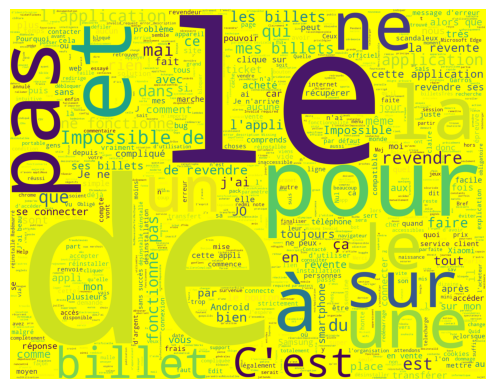

In [ ]:
#On génère un nuage de mot
wordcloud = WordCloud(
                      background_color='yellow',
                      max_words=2000,
                      width=1800,
                      height=1400,
                     ).generate(s)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# On retire les mots vides
total_term_frequency_no_stop.most_common(250)

[('billets', 73),
 ('revendre', 44),
 ('application', 42),
 ('Impossible', 35),
 ('fonctionne', 26),
 ('appli', 25),
 ('revente', 19),
 ('connecter', 18),
 ('rien', 18),
 ('cette', 17),
 ('faire', 15),
 ('bien', 14),
 ('tout', 12),
 ('Application', 12),
 ('impossible', 12),
 ('....', 12),
 ('comme', 10),
 ('toujours', 9),
 ('bouton', 9),
 ('fait', 9),
 ('places', 8),
 ('smartphone', 8),
 ('alors', 7),
 ('vente', 7),
 ('sans', 7),
 ('plus', 7),
 ('fois', 7),
 ('jour', 7),
 ('accéder', 7),
 ('transférer', 7),
 ('Très', 7),
 ('arrive', 6),
 ('récupérer', 6),
 ('clique', 6),
 ('réponse', 6),
 ('aucune', 6),
 ('Samsung', 6),
 ('tickets', 6),
 ('Android', 6),
 ('pouvoir', 6),
 ('erreur', 6),
 ('facile', 6),
 ('très', 6),
 ('comprends', 5),
 ('comment', 5),
 ('compliqué', 5),
 ('peut', 5),
 ('simple', 5),
 ('achetés', 5),
 ('téléphone', 5),
 ('peux', 5),
 ('tous', 5),
 ('Xiaomi', 5),
 ('donc', 5),
 ('problème', 5),
 ('plusieurs', 5),
 ('accès', 5),
 ('quoi', 5),
 ('Appli', 5),
 ('puis', 5),
 

In [ ]:
# On calcule et imprime le pourcentage de chaque mot parmi tous les mots non-stopwords
for w, f in total_term_frequency_no_stop.most_common(250):
    print(round(f/sum(total_term_frequency_no_stop.values())*100, 2))

4.19
2.52
2.41
2.01
1.49
1.43
1.09
1.03
1.03
0.98
0.86
0.8
0.69
0.69
0.69
0.69
0.57
0.52
0.52
0.52
0.46
0.46
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.34
0.34
0.34
0.34
0.34
0.34
0.34
0.34
0.34
0.34
0.34
0.34
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.17
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11


In [ ]:
#On calcule la somme totale des fréquences de tous les mots qui ne sont pas des stopwords
sum(total_term_frequency_no_stop.values())

1743

In [ ]:
# Apres Retraitement et suppression des stop words

tfdict = {}
for w, f in total_term_frequency_no_stop.most_common(1000):
    relative_tf = f / sum(total_term_frequency_no_stop.values())
    tfdict[w]  = relative_tf

tfdict

{'billets': 0.04188181296615032,
 'revendre': 0.025243832472748137,
 'application': 0.024096385542168676,
 'Impossible': 0.020080321285140562,
 'fonctionne': 0.01491681009753299,
 'appli': 0.01434308663224326,
 'revente': 0.010900745840504877,
 'connecter': 0.010327022375215147,
 'rien': 0.010327022375215147,
 'cette': 0.009753298909925417,
 'faire': 0.008605851979345954,
 'bien': 0.008032128514056224,
 'tout': 0.0068846815834767644,
 'Application': 0.0068846815834767644,
 'impossible': 0.0068846815834767644,
 '....': 0.0068846815834767644,
 'comme': 0.005737234652897304,
 'toujours': 0.0051635111876075735,
 'bouton': 0.0051635111876075735,
 'fait': 0.0051635111876075735,
 'places': 0.004589787722317842,
 'smartphone': 0.004589787722317842,
 'alors': 0.004016064257028112,
 'vente': 0.004016064257028112,
 'sans': 0.004016064257028112,
 'plus': 0.004016064257028112,
 'fois': 0.004016064257028112,
 'jour': 0.004016064257028112,
 'accéder': 0.004016064257028112,
 'transférer': 0.0040160642

In [ ]:
# Apres Retraitement et suppression des stop words
tfdict = {}
for w, f in total_term_frequency_no_stop.most_common(1000):
    if w == 'appli':
        tfdict["application"]+=f
    else :
        tfdict[w]  = f

In [ ]:
clean_tfdict = {}
for w, f in tfdict.items():
    clean_tfdict[w] = f/sum(total_term_frequency_no_stop.values())

clean_tfdict

{'billets': 0.04188181296615032,
 'revendre': 0.025243832472748137,
 'application': 0.03843947217441193,
 'Impossible': 0.020080321285140562,
 'fonctionne': 0.01491681009753299,
 'revente': 0.010900745840504877,
 'connecter': 0.010327022375215147,
 'rien': 0.010327022375215147,
 'cette': 0.009753298909925417,
 'faire': 0.008605851979345954,
 'bien': 0.008032128514056224,
 'tout': 0.0068846815834767644,
 'Application': 0.0068846815834767644,
 'impossible': 0.0068846815834767644,
 '....': 0.0068846815834767644,
 'comme': 0.005737234652897304,
 'toujours': 0.0051635111876075735,
 'bouton': 0.0051635111876075735,
 'fait': 0.0051635111876075735,
 'places': 0.004589787722317842,
 'smartphone': 0.004589787722317842,
 'alors': 0.004016064257028112,
 'vente': 0.004016064257028112,
 'sans': 0.004016064257028112,
 'plus': 0.004016064257028112,
 'fois': 0.004016064257028112,
 'jour': 0.004016064257028112,
 'accéder': 0.004016064257028112,
 'transférer': 0.004016064257028112,
 'Très': 0.00401606425

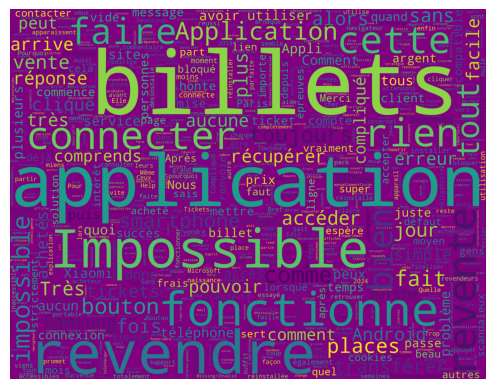

In [ ]:
# Il est tout de suite plus intéressant de travailler a partir de notre texte retraité et des fréquences des mots de notre corpus
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='purple',
                      max_words=2000,
                      width=1800,
                      height=1400,
                     ).generate_from_frequencies(clean_tfdict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

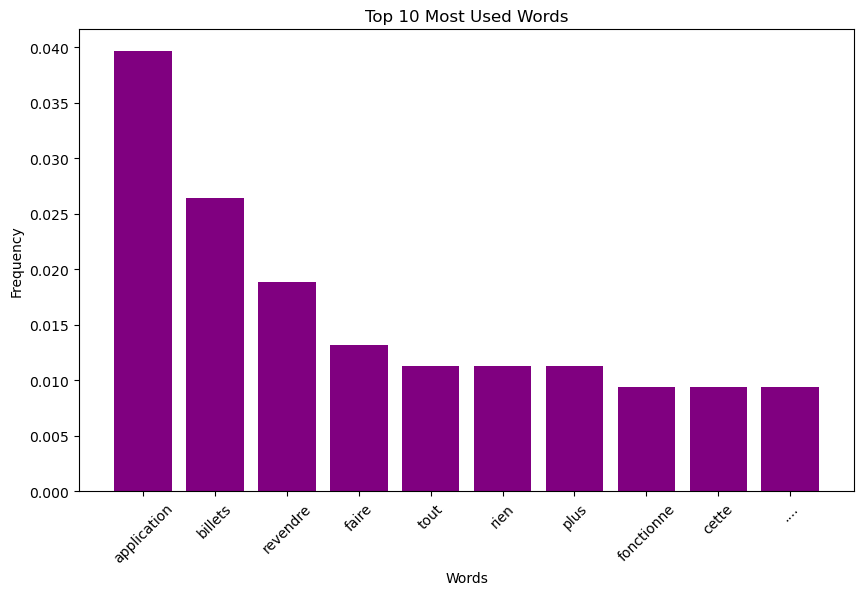

In [ ]:
# On affiche les mots les plus utilisés dans les commentaires

plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='purple')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words')
plt.xticks(rotation=45)
plt.show()

### Analyse de sentiments

In [ ]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob(s)
blob

TextBlob("Je ne comprends pas comment on récupère les billets... Pourquoi faire compliqué alors que l' on peut faire simple. Un simple téléchargement des billets électroniques aurait suffit. Perso je trouve l' application super compliquée... Du coup bah j' ai des billets quelques part mais que je n' ai pas physiquement. Une application pour les pros de l' informatique... Pas du tout satisfait.Mes.billets achetés pour 450 euros n apparaissent même pas , achetés avec on location, soidisant partenaire officiel pour une meilleure experience!!??alors que j arrive quand même à me connecter, cela me dit début juillet, mais pour une épreuve le 2 août, ça risque de faire court pour les récupérer... je suis dans un stress vu le tarif, j espère parvenir enfin à les récupérer!!! Bref déçue, et le roulement n est toujours pas résolu !Maj 05/06 : Toujours bloqué. Impossibiliter de revendre ses billets ?? Obligation de passer par l'application qui bien sur ne fonctionne pas lorsque l'on clique sur le

In [ ]:
#On extrait les scores de polarité et de subjectivité à partir de l'objet
text_sentiment = blob.sentiment
text_polarity = text_sentiment[0] # polarity = score de polarité compris entre -1 et 1
text_subjectivity = text_sentiment[1] # subjectivity = score de subjectivité compris entre 0 et 1

In [ ]:
text_sentiment

Sentiment(polarity=-0.41312056737588654, subjectivity=0.855724417426545)

In [ ]:
#On calcule la Polarité
text_polarity

-0.41312056737588654

In [ ]:
#affichage du degré d'opinion ou de subjectivité
text_subjectivity

0.855724417426545

In [ ]:
#Affichage du score de polarité
print(" Polarity :" , text_polarity)


 Polarity : -0.41312056737588654


In [ ]:
#Affichage du score de subjectivité
print(" Subjectivité :" , text_subjectivity)

 Subjectivité : 0.855724417426545


In [ ]:
#Identification détaillées sur l'analyse de sentiment
blob.sentiment_assessments


Sentiment(polarity=-0.41312056737588654, subjectivity=0.855724417426545, assessments=[(['simple'], 0.0, 0.35714285714285715, None), (['simple'], 0.0, 0.35714285714285715, None), (['super', '!', '!', '!', '!', '!'], 1.0, 0.6666666666666666, None), (['impossible'], -0.6666666666666666, 1.0, None), (['base'], -0.8, 1.0, None), (['impossible'], -0.6666666666666666, 1.0, None), (['impossible'], -0.6666666666666666, 1.0, None), ([':-(', '!'], -0.9375, 1.0, 'mood'), (['impossible', '!', '!', '!', '!', '!', '!', '!'], -1.0, 1.0, None), (['impossible', '!'], -0.8333333333333333, 1.0, None), (['simple', '!', '!'], 0.0, 0.35714285714285715, None), (['grand', '!', '!', '!', '!', '!', '!'], 1.0, 1.0, None), (['possible'], 0.0, 1.0, None), (['very', 'bad', '!', '!', '!', '!'], -1.0, 0.8666666666666667, None), (['impossible'], -0.6666666666666666, 1.0, None), (['simple'], 0.0, 0.35714285714285715, None), (['impossible', '!'], -0.8333333333333333, 1.0, None), (['impossible'], -0.6666666666666666, 1.0,

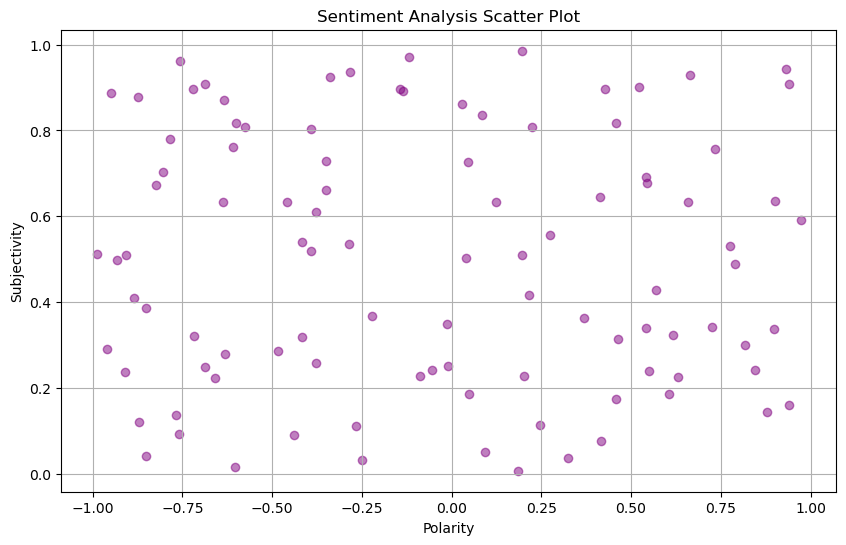

In [ ]:
# Scatter plot pour l'analyse de sentiments - On réimporte une librairie nécéssaire

import numpy as np

np.random.seed(42)
sample_size = 100
comments_df = pd.DataFrame({
    'Polarity': np.random.uniform(-1, 1, sample_size),
    'Subjectivity': np.random.uniform(0, 1, sample_size),
    'Cleaned_Comment': ['Sample comment'] * sample_size
})

plt.figure(figsize=(10, 6))
plt.scatter(comments_df['Polarity'], comments_df['Subjectivity'], alpha=0.5, color='purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()

# Résulats

Polarité globale : - 0.41312056737588654 --> Score négatif

Subjectivité globale : 0.855724417426545 --> Résultat  basé sur des opinions ou des émotions plutôt que des faits

En conclusion, les utilisateurs perçoivent l'application "Paris JO Ticket 2024" de manière plutôt négative en termes de fonctionnalité, d'utilisabilité et de satisfaction générale.

Les principales préoccupations incluent l'inaccessibilité des billets, la difficulté de revente, les nombreux problèmes techniques, et un support client indisponible.

Pour améliorer la perception des utilisateurs, il faudrait adresser ces problèmes, notamment en renforçant le support client, en améliorant la compatibilité de l'application et en corrigeant les bugs techniques.